<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline

In [1]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

### 2. EDA - ALL DONE in 5.1.1

- Explore dataset. Clean data (if required)
- Find features to predict class

### 3. Logistic Regression Model - ALL DONE in 5.1.1

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('breast-cancer-wisconsin-data.csv')

# Define target and predictors
target = 'diagnosis'
predictors = data.columns.drop(['id', target, 'Unnamed: 32'])

# Prepare the data
X = data[predictors]
y = data[target].map({'M': 1, 'B': 0})  # Map diagnosis to binary values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

# Display the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant']))
print("\nClassification Report:")
print(class_report)


Accuracy: 0.956140350877193

Confusion Matrix:
                  Predicted Benign  Predicted Malignant
Actual Benign                   70                    1
Actual Malignant                 4                   39

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        71
   Malignant       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('breast-cancer-wisconsin-data.csv')

# Define target and predictors
target = 'diagnosis'
predictors = data.columns.drop(['id', target, 'Unnamed: 32'])

# Prepare the data
X = data[predictors]
y = data[target].map({'M': 1, 'B': 0})  # Map diagnosis to binary values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb, target_names=['Benign', 'Malignant'])

# Display the results
print(f"Accuracy: {accuracy_nb}")
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix_nb, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant']))
print("\nClassification Report:")
print(class_report_nb)



Accuracy: 0.9736842105263158

Confusion Matrix:
                  Predicted Benign  Predicted Malignant
Actual Benign                   71                    0
Actual Malignant                 3                   40

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        71
   Malignant       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 6 Gridsearch optimal parameters for Logistic Regression and SVM models

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid search to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------

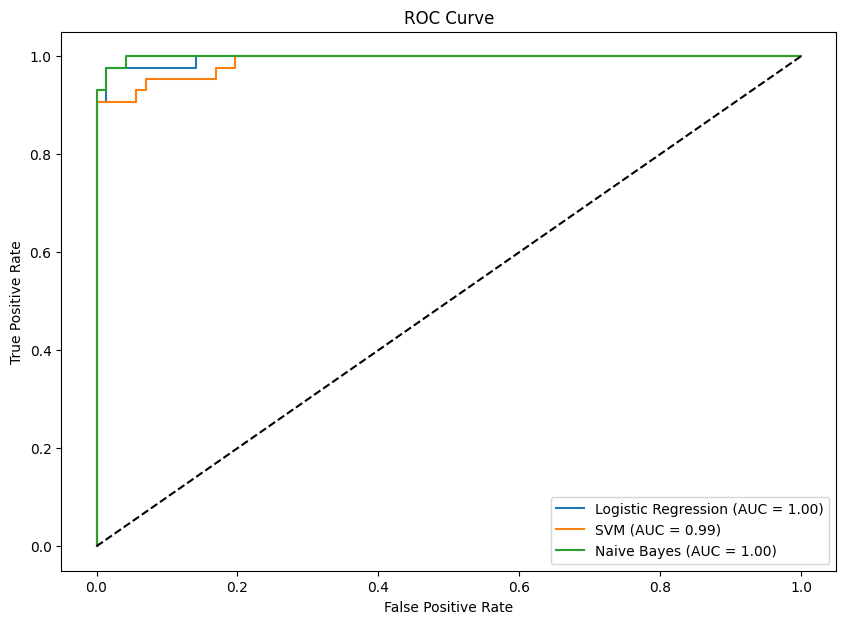

Best Logistic Regression Model: LogisticRegression(C=100, max_iter=10000)
Best Logistic Regression Score: 0.9670329670329672
Best SVM Model: SVC(C=100, gamma=0.001, kernel='linear')
Best SVM Score: 0.9604395604395604


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('breast-cancer-wisconsin-data.csv')

# Define target and predictors
target = 'diagnosis'
predictors = data.columns.drop(['id', target, 'Unnamed: 32'])

# Prepare the data
X = data[predictors]
y = data[target].map({'M': 1, 'B': 0})  # Map diagnosis to binary values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def grid_search_logistic_regression(X_train, y_train):
    param_grid = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
    log_reg = LogisticRegression(max_iter=10000)
    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_score_

def grid_search_svm(X_train, y_train):
    param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_score_

# Perform Grid Search
best_log_reg, best_score_log_reg = grid_search_logistic_regression(X_train, y_train)
best_svm, best_score_svm = grid_search_svm(X_train, y_train)

# Train and Evaluate Models
best_log_reg.fit(X_train, y_train)
best_svm.fit(X_train, y_train)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

# Calculate ROC AUC
roc_auc_log_reg = roc_auc_score(y_test, best_log_reg.decision_function(X_test))
roc_auc_svm = roc_auc_score(y_test, best_svm.decision_function(X_test))
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])

# Plot ROC Curves
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, best_log_reg.decision_function(X_test))
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.decision_function(X_test))
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("Best Logistic Regression Model:", best_log_reg)
print("Best Logistic Regression Score:", best_score_log_reg)
print("Best SVM Model:", best_svm)
print("Best SVM Score:", best_score_svm)


#### 6.1 Find Best Estimator For Logistic Regression - DONE ABOVE

Find out how these parameters effect model. Find out the best estimator, score. - DONE ABOVE

In [2]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

#### 6.2 Find Best Estimator For SVM - - DONE ABOVE

Find out how these parameters effect model. Find out the best estimator, score. - - DONE ABOVE

In [3]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot - - DONE ABOVE

Find out which model performs better.

### 7. [BONUS] Learning Curve

A learning curve compares the validation and training performance of an estimator for varying amounts of training data. If both the validation and training score converge to a value that is too low, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------

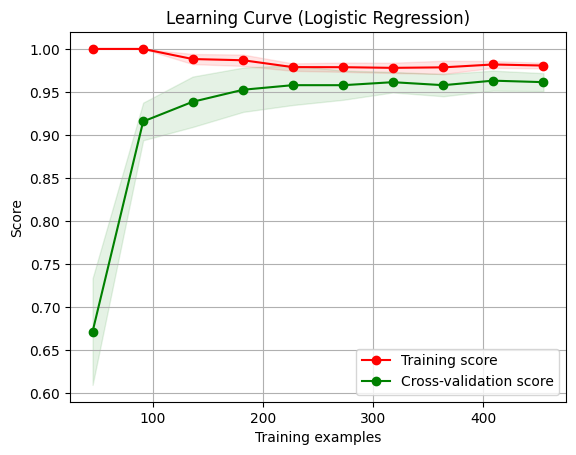

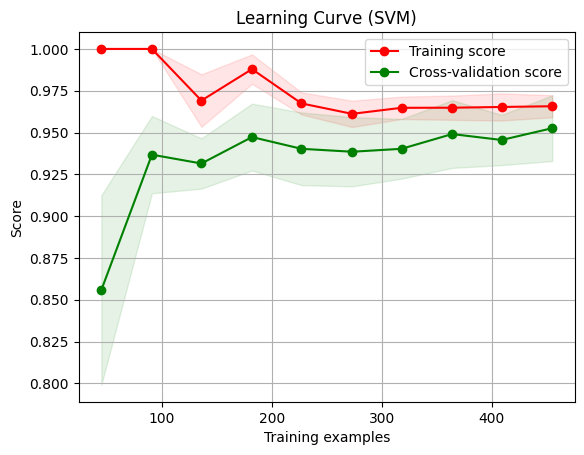

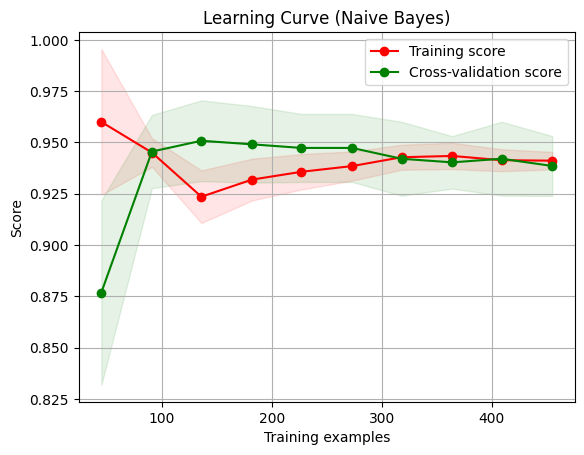

In [2]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the dataset
data = pd.read_csv('breast-cancer-wisconsin-data.csv')

# Define target and predictors
target = 'diagnosis'
predictors = data.columns.drop(['id', target, 'Unnamed: 32'])

# Prepare the data
X = data[predictors]
y = data[target].map({'M': 1, 'B': 0})  # Map diagnosis to binary values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def grid_search_logistic_regression(X_train, y_train):
    param_grid = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
    log_reg = LogisticRegression(max_iter=10000)
    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_score_

def grid_search_svm(X_train, y_train):
    param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_score_

# Perform Grid Search
best_log_reg, best_score_log_reg = grid_search_logistic_regression(X_train, y_train)
best_svm, best_score_svm = grid_search_svm(X_train, y_train)

# Train and Evaluate Models
best_log_reg.fit(X_train, y_train)
best_svm.fit(X_train, y_train)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(best_log_reg, "Learning Curve (Logistic Regression)", X, y)
plot_learning_curve(best_svm, "Learning Curve (SVM)", X, y)
plot_learning_curve(nb_model, "Learning Curve (Naive Bayes)", X, y)

plt.show()


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



